In [113]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
from azureml.core import Workspace, Dataset

subscription_id = '6ed9d167-b2e6-41b8-9500-35e6df64d9dc'
resource_group = 'MLRG'
workspace_name = 'erbbimlws'

workspace = Workspace(subscription_id, resource_group, workspace_name)

dataset = Dataset.get_by_name(workspace, name='Edges')
df = dataset.to_pandas_dataframe()

In [4]:
df.columns = ['source','target']

In [5]:
df.head()

,source,target
0,Other Services,Platform Fees
1,Total Budgeted Funds,Platform Fees
2,ΖΩΗΣ,Platform Fees
3,Total Budgeted Funds,Home Loans
4,Debit Cards,Other Services


In [6]:
G = nx.DiGraph()

In [101]:
G = nx.from_pandas_edgelist(df_f, "source","target",['weight'])

In [135]:
fig = plt.figure(figsize =(40000,40000),dpi = 300)



<Figure size 1.2e+07x1.2e+07 with 0 Axes>

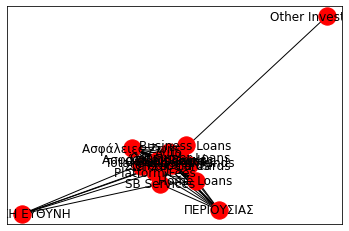

In [136]:
#plt.figure(figsize =(90, 9))
nx.draw_networkx(G,node_color ='red')
plt.savefig("sample.jpg")

In [91]:
df['weight'] =1

In [93]:
df_f = pd.DataFrame(df.groupby(['source','target'],as_index = True,axis=0)['weight'].sum()).reset_index()

In [99]:
df_f.head()

,source,target,weight
0,Auto,Business Loans,1
1,Auto,Consumer Loans,24
2,Auto,Credit Cards,51
3,Auto,Debit Cards,274
4,Auto,Home Loans,1
